# HW7 - Electrochemistry

In [1]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np

A solution is prepared by mixing 50 mL of 0.01 M lithium napthalate (the reduced anion of napthalene), 5 mL of 0.02 M cupric nitrate, and 5 mL of 0.04 M buckminsterfullerene (C<sub>60</sub>). A platinum electrode is placed in the resulting solution. A second solution is prepared by inserting a silver electrode into a solution containing 0.10M sodium chloride. An AgCl coating is formed on the electrode by applying an external potential that oxidizes some of the Ag metal to create an AgCl precipitate at the surface. The coated Ag electrode is now ready to be used as one of the two half-cells for our measurements. A salt bridge is connected between two solutions and the potential is measured between the two electrodes with a high input impedance potentiometer.

<img src="cell_potentials.png" width="400">

## 1
What is the concentration of the dominant species after the first solution reaches equilibrium? (an example is C<sub>60</sub><sup>-</sup> = 1.67x10<sup>-3</sup> M)

In [32]:
Ci_nap1 = 0.05*0.01
Ci_C0 = 0.005*0.04
Ci_Cu2 = 0.005*0.02

C_C1 = Ci_nap1-Ci_Cu2-Ci_C0
C_Cu0 = Ci_Cu2
C_nap0 = Ci_nap1
print C_nap0/0.06, "M"
print C_Cu0/0.06, "M"
print C_C1/0.06, "M"

0.00833333333333 M
0.00166666666667 M
0.00333333333333 M


## 2
What are the concentrations of all the species in the first solution after it reaches equilibrium? Include the concentrations of the minor species as well.

In [23]:
def nerst(n, E_o, E):
    T = 298
    F = 96485
    R = 8.314
    val = 10**(n*F*(E_o-E)/(2.303*R*T))
    
    return val

E = 0.0

E_Cu1 = 0.518
E_Cu2_2 = 0.339
E_Cu2 = 0.161
E_C0 = -0.09
E_C1 = -0.750
E_C2 = -1.270
E_C3 = -1.750
E_nap0 = -2.6

Cu_i = 0.005*0.02/0.06 # starting conc
Cu2 = Cu_i*1.0
Cu1 = Cu_i*nerst(1.0,(E_Cu2),(E))
Cu0 = Cu_i*nerst(2.0,(E_Cu2_2),(E))+nerst(1.0,(E_Cu2+E_Cu1),(2.0*E))
C_i = 0.05*0.01/0.06
C0 = C_i*1.0
C1 = C_i*nerst(1.0,(E_C0),(E))
C2 = C_i*nerst(1.0,(E_C0+E_C1),(2.0*E))
C3 = C_i*nerst(1.0,(E_C0+E_C1+E_C2),(3.0*E))
C4 = C_i*nerst(1.0,(E_C0+E_C1+E_C2+E_C3),(4.0*E))
nap_i = 0.005*0.04/0.06
nap0 = nap_i*1.0
nap1 = nap_i*nerst(1.0,(E_nap0),(E))

Cv = Cu2+Cu1+Cu0+C0+C1+C2+C3+C4+nap0+nap1

print Cu2
print Cu1
print Cu0
print C0
print C1
print C2
print C3
print C4
print nap0
print nap1

0.00166666666667
0.879697778073
3.03724004201e+11
0.00833333333333
0.000250572191549
5.20655567738e-17
1.74200633527e-38
4.45475923051e-68
0.00333333333333
3.60816660967e-47


## 3
Draw two distribution diagrams that show the changes in the fractional distribution of all the species as a function of the cell potential. The first diagram should have a linear ordinate and the second a logaritmic ordinate. Can the Cu<sup>+</sup> coexist with the Cu<sup>2+</sup> and Cu<sup>0</sup> at equilibrium? 

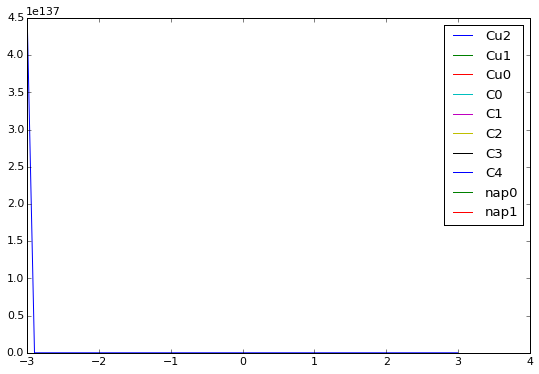

In [33]:
def nerst(n, E_o, E):
    T = 298
    F = 96485
    R = 8.314
    val = 10**(n*F*(E_o-E)/(2.303*R*T))
    
    return val

E = np.arange(-3.0,3.1,0.1)

E_Cu1 = 0.518
E_Cu2_2 = 0.339
E_Cu2 = 0.161
E_C0 = -0.09
E_C1 = -0.750
E_C2 = -1.270
E_C3 = -1.750
E_nap0 = -2.6

Cu2 = 1.0+np.zeros(np.size(E))
Cu1 = nerst(1.0,(E_Cu2),(E))
Cu0 = nerst(2.0,(E_Cu2_2),(E))+nerst(1.0,(E_Cu2+E_Cu1),(2.0*E))
C0 = 1.0+np.zeros(np.size(E))
C1 = nerst(1.0,(E_C0),(E))
C2 = nerst(1.0,(E_C0+E_C1),(2.0*E))
C3 = nerst(1.0,(E_C0+E_C1+E_C2),(3.0*E))
C4 = nerst(1.0,(E_C0+E_C1+E_C2+E_C3),(4.0*E))
nap0 = 1.0+np.zeros(np.size(E))
nap1 = nerst(1.0,(E_nap0),(E))

Cv = Cu2+Cu1+Cu0+C0+C1+C2+C3+C4+nap0+nap1

plt.plot(E,(Cu2))
plt.plot(E,(Cu1))
plt.plot(E,(Cu0))
plt.plot(E,(C0))
plt.plot(E,(C1))
plt.plot(E,(C2))
plt.plot(E,(C3))
plt.plot(E,(C4))
plt.plot(E,(nap0))
plt.plot(E,(nap1))
plt.legend(['Cu2','Cu1','Cu0','C0','C1','C2','C3','C4','nap0','nap1'])

## 4
What is the half cell potential of the first solution relative to a standard hydrogen electrode? (between -0.5 and -0.8 V)

In [21]:
E_1 = -0.750 # C1/C2 equilibrium
print E_1

-0.75


## 5
What is the half cell potential of the second solution relative to a standard hydrogen electrode? (0.28 V)

In [18]:
AgCl = 0.1 # M
E_2 = 0.22-0.059/1.0*np.log(1.0/AgCl)
print E_2

0.0841474795134


## 6
What is the final cell potential?

In [22]:
E = E_2-E_1 #red-ox
print E

0.834147479513


## 7
Which solution is the cathode (electrode where reduction occurs) and which is the anode (electrode where oxidation occurs)?

The first solution is the anode and the second solution is the cathode.

## 8
If the cell potential is measured with a voltmeter that requires 5 picoamperes of current for the measurement and if the voltage is measured for 1 hour, how much will the concentration of the dominant species change? Express your answer as a % change.

In [28]:
t = 3600 # s
i = 5.0E-12 #Amps
e_charge = 1.6E-19
Na = 6.02E23
Q = i*t
e = Q/e_charge
Conc = e/Na/0.06
print Conc

3.1146179402e-12


## 9
If a 100 milliampere current is drawn from this cell, how long will this cell provide current? Express your answer in hours.

In [29]:
i = 0.001
e = Conc*Na*0.06
Q = e*e_charge
t = Q/i
t_h = t/3600
print t_h

5e-09
